# CLUSTERING - Mall Customers Segmentation

## Algorithms :
### K - Means Clustering
### Hierarchical Clustering

In [404]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [434]:
df = pd.read_csv('Mall_Customers.csv')
df_1 = df
df_2 = df
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Customer ID = Unique ID assigned to the customer<br>
Gender = Gender of the customer<br>
Age =  Age of the customer<br>
Annual Income = Annual Income of the customer<br>
Spending score = Score assigned by the mall based on customer behavior and spending nature<br>

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [422]:
print(pd.isnull(df).sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [423]:
fig = px.scatter(df_1,x='Spending Score (1-100)',y='Age')
fig.show()

In [424]:
X = df_1[['Spending Score (1-100)','Age']]
X.head()

,Spending Score (1-100),Age
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31


# K - MEANS CLUSTERING

init: Initialization method of the centroids.<br>
Value will be: "k-means++"<br>
k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.<br><br>
n_clusters: The number of clusters to form as well as the number of centroids to generate.<br>
Value will be: 2 (since we have 2 centers)<br><br>
n_init: Number of time the k-means algorithm will be run with different centroid seeds.

In [425]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 100)

In [426]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=100)

In [427]:
k_means_labels = k_means.labels_
k_means_labels[:5]

array([2, 0, 1, 0, 2])

In [428]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[80.74193548, 29.56451613],
       [14.59574468, 42.95744681],
       [47.78021978, 43.05494505]])

In [429]:
df_1['cluster'] = k_means_labels
df_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


Text(0.5, 1.0, 'Clusterd data')

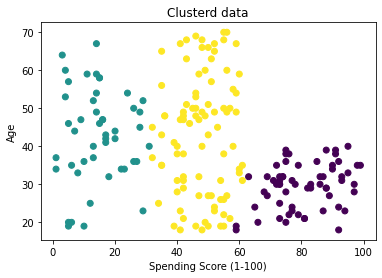

In [430]:
plt.scatter(x=df_1['Spending Score (1-100)'],y=df_1['Age'],c=df_1['cluster'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.title('Clusterd data')

In [431]:
df_1['cluster'] = df_1['cluster'].replace([0],'Higher Spending Score')
df_1['cluster'] = df_1['cluster'].replace([2],'Medium Spending Score')
df_1['cluster'] = df_1['cluster'].replace([1],'Lower Spending Score')
df_1.rename(columns = {'cluster':'Segments of Spending Score'}, inplace = True)

In [432]:
df_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segments of Spending Score
0,1,Male,19,15,39,Medium Spending Score
1,2,Male,21,15,81,Higher Spending Score
2,3,Female,20,16,6,Lower Spending Score
3,4,Female,23,16,77,Higher Spending Score
4,5,Female,31,17,40,Medium Spending Score


In [433]:
#PLOTLY GRAPH
fig = px.scatter(df_1,x='Spending Score (1-100)',y='Age',color='Segments of Spending Score')
fig.show()

### We can cluster the data to Segments of Spending Score : Lower, Medium and Higher

# HIERARCHICAL CLUSTERING

In [435]:
df_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [436]:
X1 = df_2[['Spending Score (1-100)','Annual Income (k$)']]
X1.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


Text(0, 0.5, 'Age')

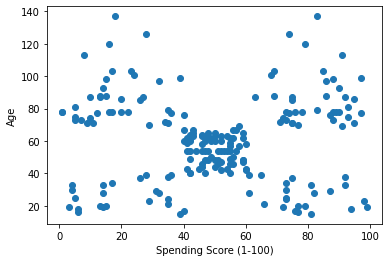

In [437]:
plt.scatter(x=df_2['Spending Score (1-100)'],y=df_2['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')

In [438]:
dist_matrix = euclidean_distances(X1/100,X1/100) 
print(dist_matrix)

[[0.         0.42       0.33015148 ... 1.16387285 1.23794184 1.29691943]
 [0.42       0.         0.75006666 ... 1.11220502 1.37306227 1.22016392]
 [0.33015148 0.75006666 0.         ... 1.29321305 1.21593585 1.43422453]
 ...
 [1.16387285 1.11220502 1.29321305 ... 0.         0.57070132 0.1421267 ]
 [1.23794184 1.37306227 1.21593585 ... 0.57070132 0.         0.65      ]
 [1.29691943 1.22016392 1.43422453 ... 0.1421267  0.65       0.        ]]


In [439]:
HC = AgglomerativeClustering(n_clusters = 3, linkage = 'ward') # ward - Centroid linkage Clustering
HC.fit(dist_matrix)

AgglomerativeClustering(n_clusters=3)

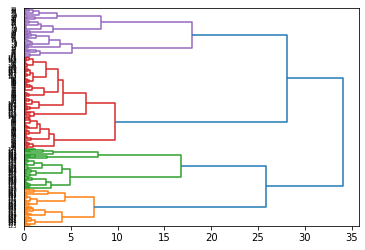

In [440]:
Z = hierarchy.linkage(dist_matrix, 'ward') # ward - Centroid linkage Clustering
dendro = hierarchy.dendrogram(Z,orientation = 'right')

In [441]:
df_2['cluster'] = HC.labels_
df_2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


Text(0.5, 1.0, 'Clusterd data')

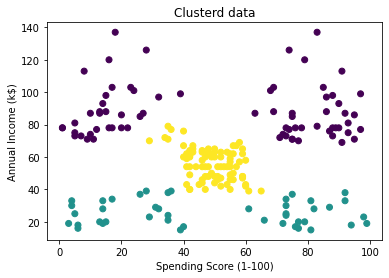

In [443]:
plt.scatter(x=df_2['Spending Score (1-100)'],y=df_2['Annual Income (k$)'],c=df_2['cluster'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Clusterd data')

In [444]:
df_2['cluster'] = df_2['cluster'].replace([1],'Lower Annual Income')
df_2['cluster'] = df_2['cluster'].replace([2],'Medium Annual Income')
df_2['cluster'] = df_2['cluster'].replace([0],'Higher Annual Income')
df_2.rename(columns = {'cluster':'Annual Income with respect to Spending score'}, inplace = True)

In [445]:
df_2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income with respect to Spending score
0,1,Male,19,15,39,Lower Annual Income
1,2,Male,21,15,81,Lower Annual Income
2,3,Female,20,16,6,Lower Annual Income
3,4,Female,23,16,77,Lower Annual Income
4,5,Female,31,17,40,Lower Annual Income
...,...,...,...,...,...,...
195,196,Female,35,120,79,Higher Annual Income
196,197,Female,45,126,28,Higher Annual Income
197,198,Male,32,126,74,Higher Annual Income
198,199,Male,32,137,18,Higher Annual Income


In [446]:
fig = px.scatter(df_2,x='Spending Score (1-100)',y='Annual Income (k$)',color='Annual Income with respect to Spending score')
fig.show()

### We can cluster the data based on Annual Income with respect to Spending score : Lower, Medium and Higher